Convolutional Neural Network 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

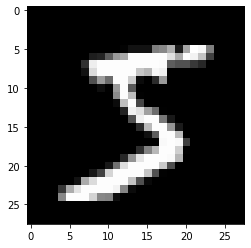

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

In [9]:
y_train[0]

5

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)# Here 1 is for black and white

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(32,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(28,28,1)))

In [17]:
model.add(MaxPool2D(pool_size=2))

In [18]:
model.add(Conv2D(32,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

          

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2598 - accuracy: 0.9409 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0707 - accuracy: 0.9789 - val_loss: 0.0571 - val_accuracy: 0.9839
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0582 - val_accuracy: 0.9819


In [26]:

import numpy as np
model.predict(X_train)[0]
y_train_pred=np.argmax(model.predict(X_train),axis=1)
y_test_pred=np.argmax(model.predict(X_test),axis=1)
from sklearn.metrics import confusion_matrix,accuracy_score

In [27]:
print("Confusion Matrix")
print(confusion_matrix(y_pred=y_train_pred,y_true=y_train))
print("\n")
print(f"Accuracy {accuracy_score(y_pred=y_train_pred,y_true=y_train)}")


Confusion Matrix
[[5847    2   12    8    2    2    7    3   19   21]
 [   0 6634   16    6   10    3    2   21   40   10]
 [   0    1 5927    9    1    0    0   14    6    0]
 [   0    0    5 6102    0    8    0   14    1    1]
 [   0    1   19    0 5714    0    3   13    1   91]
 [   1    1    0   44    0 5343    5    0   24    3]
 [  13    4    5    3    8   29 5807    0   48    1]
 [   0    7   32    2    5    0    0 6196    4   19]
 [   1    2   19   29    7    7    0    6 5758   22]
 [   3    0    0   14   12    2    0   14    8 5896]]


Accuracy 0.9870666666666666
